In [14]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import illustris_python as il
import sys
sys.path.append('../../py_files/')
#import weights
import control_sample as control
import BRAHMA_python as il_brahma
from tqdm import tqdm
import host_galaxy_enhancement_plots as hostplot

In [28]:
plt.style.use(["science"])

In [29]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
tng_pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/'

TNG_basepath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
TNG_50_pop = control.load_pop_file(TNG_basepath,tng_pop_file_path,[0,0,1000,1])
TNG_50_control = control.control_samples_TNG(TNG_50_pop)
TNG_color = '#af8dc3'

brahma_basepath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/"
brahma_simName_array = ['SM5_TNG','SM5_LW10_TNG','SM5_LW10_LOWSPIN_TNG','SM5_LW10_LOWSPIN_RICH_TNG']
brahma_sim_colors = {brahma_simName_array[0]: '#bdc9e1', brahma_simName_array[1]: '#67a9cf', brahma_simName_array[2]: '#1c9099', brahma_simName_array[3]: '#016c59'}
brahma_sim_obj = {}
brahma_sim_zbins = {}
#brahma_sim_zbin_width = {}
for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    brahma_sim_obj[sim] = brahma_control
    #brahma_sim_zbin_width,brahma_sim_zbins[sim] =hostplot.find_best_z_width(brahma_control.z_merging_pop,z_min=0,z_max=10,z_width_initial=0.2)
    brahma_sim_zbins[sim] = hostplot.find_adaptive_z_bins(brahma_control.z_merging_pop,z_min=0,z_max=12,zbin_width=0.3,min_N_values=5)
    print(sim,brahma_sim_zbins[sim])


TNG_50_zbins = hostplot.find_adaptive_z_bins(TNG_50_control.z_merging_pop,z_min=0,z_max=10,zbin_width=0.3,min_N_values=40)
print('TNG50',TNG_50_zbins )
brahma_zbins = hostplot.find_brahma_adaptive_z_bins(brahma_sim_obj,brahma_simName_array,z_lower=0,z_max=15,zbin_width=0.4,min_N_values=10)
print('Brahma common zbins:',brahma_zbins)


processing each merger redshifts for controls: 100%|██████████| 83/83 [00:00<00:00, 170.84it/s]


Number of available mergers in this population is 504
Number of cases where a close enough match is not found within the acceptable tolerance: 28


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 580.80it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 119
number of processable mergers with valid controls:
655
[28, 46, 52, 92, 97, 138, 97, 48, 33, 17, 7]
SM5_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 8.1]


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 638.34it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 117
number of processable mergers with valid controls:
526
[23, 33, 48, 63, 69, 96, 88, 52, 31, 16, 5]
SM5_LW10_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 7.1]


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 705.47it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 85
number of processable mergers with valid controls:
400
[26, 22, 27, 40, 44, 91, 59, 35, 26, 19, 6, 5]
SM5_LW10_LOWSPIN_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 7.1 9.1]


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 873.56it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 54
number of processable mergers with valid controls:
122
[7, 6, 18, 14, 25, 12, 17, 11, 5, 5]
SM5_LW10_LOWSPIN_RICH_TNG [0.  0.3 0.6 1.  1.5 2.1 3.1 4.1 5.1 6.1 8.1]
[55, 54, 54, 41, 55, 49, 55, 46, 43]
TNG50 [0.  0.3 0.6 0.9 1.2 1.5 1.9 2.3 2.7 3.5]
Brahma common zbins: [0.  0.4 1.  1.6 2.2 3.1 4.1 5.1 8.1]


In [30]:
sim_names = brahma_simName_array + ['TNG50']
sim_colors = [brahma_sim_colors[sim] for sim in brahma_simName_array] + [TNG_color]
sim_objs = brahma_sim_obj
sim_objs['TNG50'] = TNG_50_control
sim_zbins_list = [brahma_zbins for _ in brahma_simName_array] + [TNG_50_zbins]

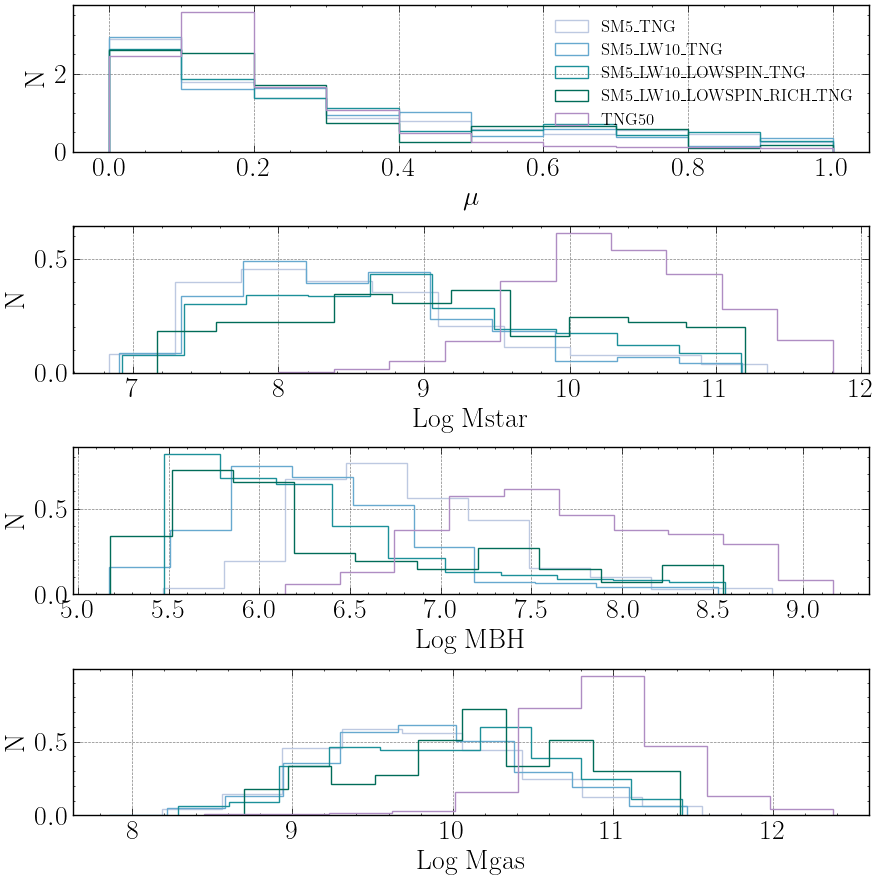

In [42]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=5,legendsize=12)
fig,axes = plt.subplots(4,1,figsize=(9,9),sharex=False)
ax1 = hostplot.plot_dist_for_sim(axes[0],sim_objs,sim_names,sim_colors,quantity_name='q_merger',log_bins=False,bins=10,range=(0,1))
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('N')
ax1.legend()

ax2 = hostplot.plot_dist_for_sim(axes[1],sim_objs,sim_names,sim_colors,quantity_name='Mstar_merging_pop',log_bins=True,bins=10)
ax2.set_xlabel('Log Mstar')
ax2.set_ylabel('N')

ax3 = hostplot.plot_dist_for_sim(axes[2],sim_objs,sim_names,sim_colors,quantity_name='MBH_merging_pop',log_bins=True,bins=10)
ax3.set_xlabel('Log MBH')
ax3.set_ylabel('N')

ax4 = hostplot.plot_dist_for_sim(axes[3],sim_objs,sim_names,sim_colors,quantity_name='Mgas_merging_pop',log_bins=True,bins=10)
ax4.set_xlabel('Log Mgas')
ax4.set_ylabel('N')
fig.tight_layout()

for spine in ax1.spines.values():
    spine.set_linewidth(1)
for spine in ax2.spines.values():
    spine.set_linewidth(1) 
for spine in ax3.spines.values():
    spine.set_linewidth(1)
for spine in ax4.spines.values():
    spine.set_linewidth(1)


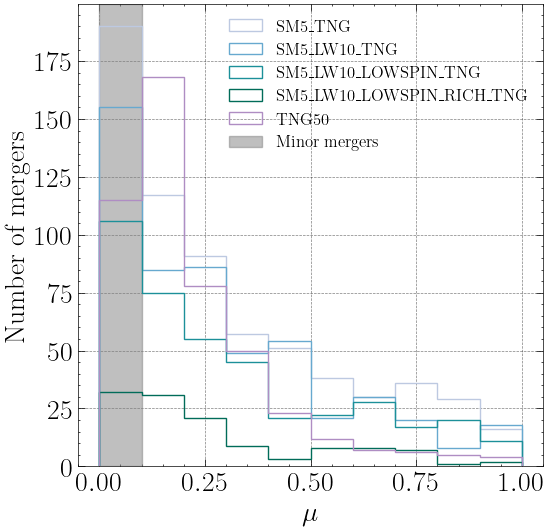

In [32]:

fig,ax = plt.subplots(1,1,figsize=(6,6),sharex=True)
for i,sim in enumerate(sim_names):
    ax.hist(sim_objs[sim].q_merger,bins=10,range=(0,1),histtype='step',color=sim_colors[i],label=sim)
ax.set_xlabel('$\mu$')
ax.set_ylabel('Number of mergers')

#shade the 0-0.1 region 
ax.axvspan(0, 0.1, color='gray', alpha=0.5,label='Minor mergers')
ax.legend()
# ax.set_title('Mass ratio')

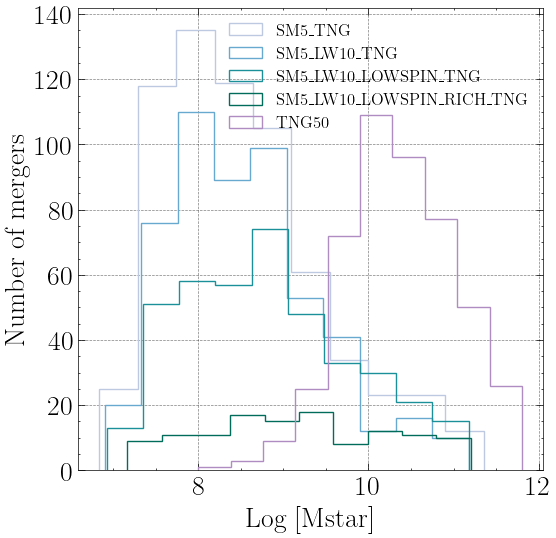

In [33]:
hostplot.set_plot_style(linewidth=5, titlesize=20,labelsize=20,ticksize=5,legendsize=12)
fig,ax = plt.subplots(1,1,figsize=(6,6),sharex=True)
for i,sim in enumerate(sim_names):
    ax.hist(np.log10(sim_objs[sim].Mstar_merging_pop),bins=10,histtype='step',color=sim_colors[i],label=sim)
ax.set_xlabel('Log [Mstar]')
ax.set_ylabel('Number of mergers')

#shade the 0-0.1 region 
#ax.axvspan(0, 0.1, color='gray', alpha=0.5,label='Minor mergers')
ax.legend()

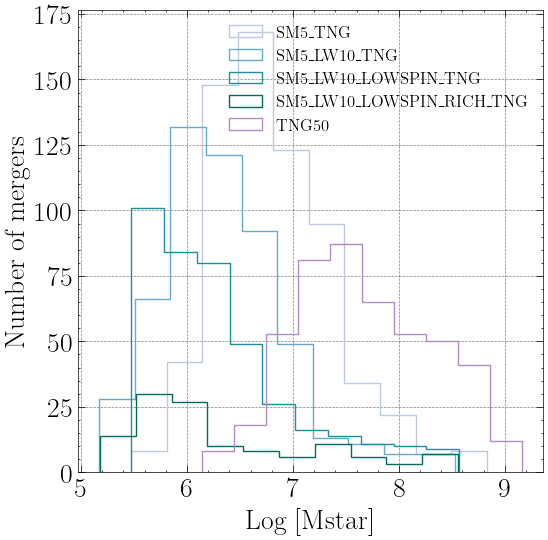

In [34]:
hostplot.set_plot_style(linewidth=5, titlesize=20,labelsize=20,ticksize=5,legendsize=12)
fig,ax = plt.subplots(1,1,figsize=(6,6),sharex=True)
for i,sim in enumerate(sim_names):
    ax.hist(np.log10(sim_objs[sim].MBH_merging_pop),bins=10,histtype='step',color=sim_colors[i],label=sim)
ax.set_xlabel('Log [Mstar]')
ax.set_ylabel('Number of mergers')

#shade the 0-0.1 region 
#ax.axvspan(0, 0.1, color='gray', alpha=0.5,label='Minor mergers')
ax.legend()

Text(0.5, 0, 'z')

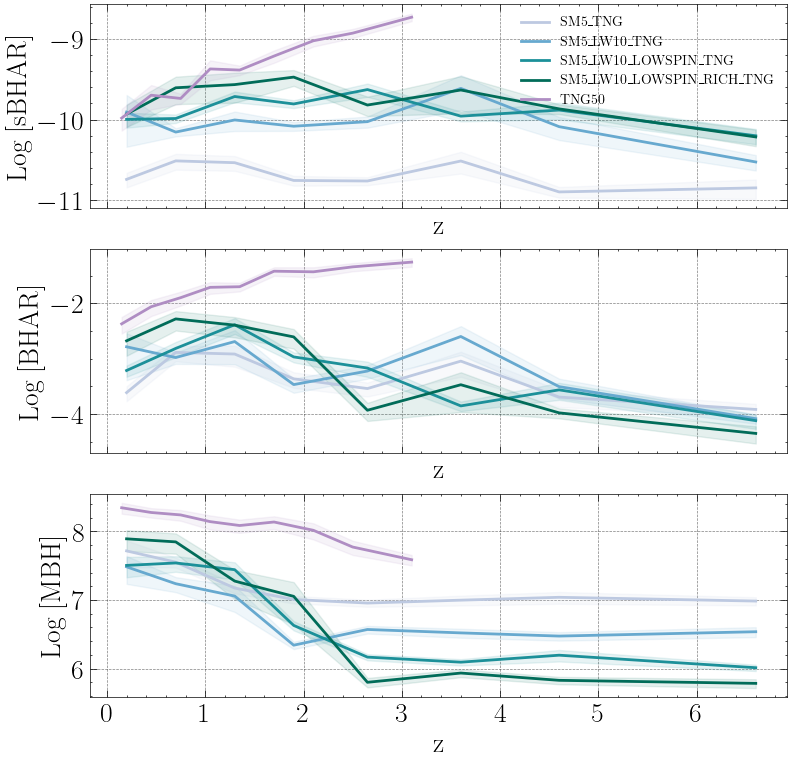

In [35]:
fig,axes = plt.subplots(3,1,figsize=(9,9),sharex=True)
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=5,legendsize=10)


ax1 = hostplot.plot_evolution_z_for_sim(axes[0],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='sBHAR_merging_pop',plot_log10=True)
ax1.set_ylabel("Log [sBHAR]")
ax1.set_xlabel("z")



ax2 = hostplot.plot_evolution_z_for_sim(axes[2],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='MBH_merging_pop',plot_log10=True)
ax2.set_ylabel("Log [MBH]")
ax2.set_xlabel("z")
ax1.legend()


ax3 = hostplot.plot_evolution_z_for_sim(axes[1],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='Mdot_merging_pop',plot_log10=True)
ax3.set_ylabel("Log [BHAR]")
ax3.set_xlabel("z")


#ax1.set_yscale('log',base=10)

Text(0.5, 0, 'z')

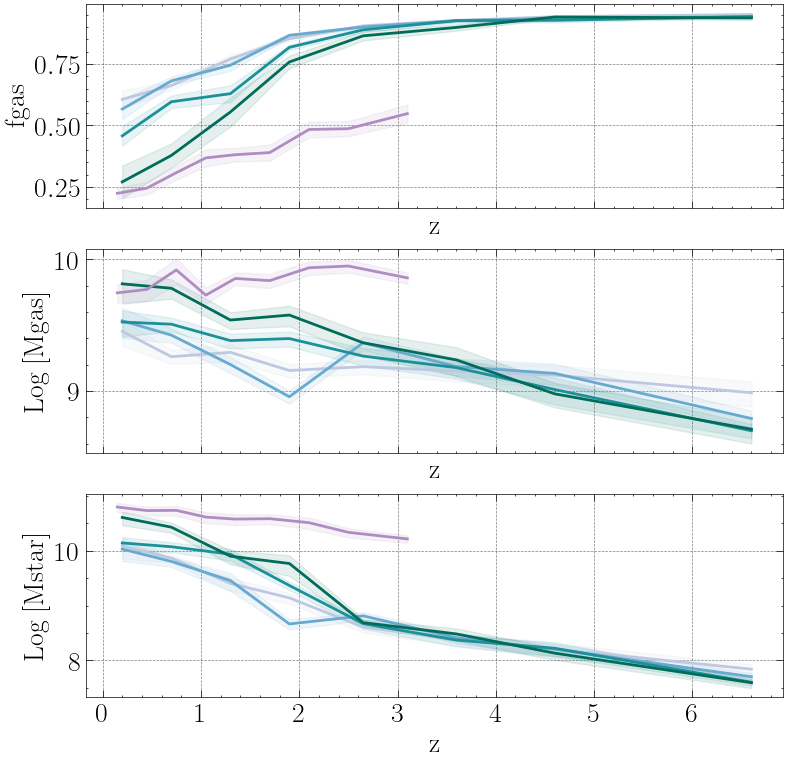

In [36]:
fig,axes = plt.subplots(3,1,figsize=(9,9),sharex=True)
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=5,legendsize=10)


ax1 = hostplot.plot_evolution_z_for_sim(axes[0],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='fgas_progs',plot_log10=False)
ax1.set_ylabel("fgas")
ax1.set_xlabel("z")
#ax1.set_yscale('log',base=10)


ax2 = hostplot.plot_evolution_z_for_sim(axes[1],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='MgasInRad',plot_log10=True)
ax2.set_ylabel("Log [Mgas]")
ax2.set_xlabel("z")
# ax1.legend()


ax3 = hostplot.plot_evolution_z_for_sim(axes[2],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='MstarInRad',plot_log10=True)
ax3.set_ylabel("Log [Mstar]")
ax3.set_xlabel("z")
# ax3 = hostplot.plot_evolution_z_for_sim(axes[1],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='Mdot_merging_pop',plot_log10=True)
# ax3.set_ylabel("Log [BHAR]")
# ax3.set_xlabel("z")



Text(0.5, 0, 'z')

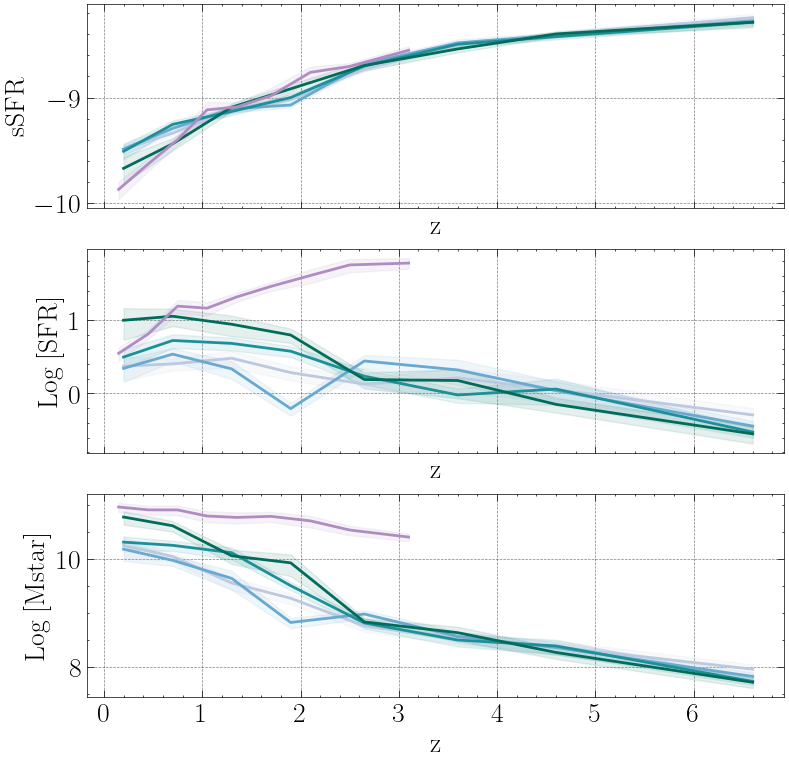

In [37]:
fig,axes = plt.subplots(3,1,figsize=(9,9),sharex=True)
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=5,legendsize=10)


ax1 = hostplot.plot_evolution_z_for_sim(axes[0],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='sSFR_merging_pop',plot_log10=True)
ax1.set_ylabel("sSFR")
ax1.set_xlabel("z")
#ax1.set_yscale('log',base=10)


ax2 = hostplot.plot_evolution_z_for_sim(axes[1],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='SFR_merging_pop',plot_log10=True)
ax2.set_ylabel("Log [SFR]")
ax2.set_xlabel("z")
# ax1.legend()


ax3 = hostplot.plot_evolution_z_for_sim(axes[2],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='Mstar_merging_pop',plot_log10=True)
ax3.set_ylabel("Log [Mstar]")
ax3.set_xlabel("z")
# ax3 = hostplot.plot_evolution_z_for_sim(axes[1],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='Mdot_merging_pop',plot_log10=True)
# ax3.set_ylabel("Log [BHAR]")
# ax3.set_xlabel("z")

In [25]:
# fig,axes = plt.subplots(3,1,figsize=(9,9),sharex=True)
# hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=5,legendsize=10)


# ax1 = hostplot.plot_evolution_z_for_sim(axes[0],sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name='StellarHalfmassRad_merging_pop',plot_log10=True)
# ax1.set_ylabel("r_half (kpc)")
# ax1.set_xlabel("z")
# #ax1.set_yscale('log',base=10)


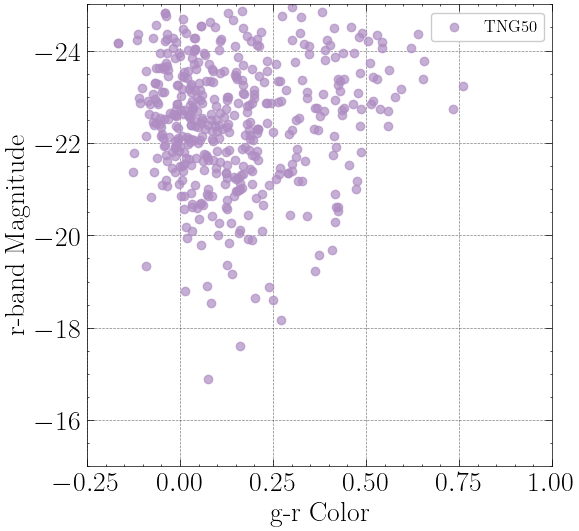

In [26]:
TNG_50_Mg = TNG_50_control.SubhaloPhotoMag_merging_pop[:,4]
TNG_50_Mr = TNG_50_control.SubhaloPhotoMag_merging_pop[:,5]

TNG_50_control_Mg = TNG_50_pop["non_merging_population"]['SubhaloPhotoMag'][:,4]
TNG_50_control_Mr = TNG_50_pop["non_merging_population"]['SubhaloPhotoMag'][:,5]

#plot color magnitude diagram
hostplot.set_plot_style(linewidth=5, titlesize=20,labelsize=20,ticksize=5,legendsize=12)
fig,ax = plt.subplots(1,1,figsize=(6,6),sharex=True)
ax.scatter(TNG_50_Mg - TNG_50_Mr, TNG_50_Mr, color=TNG_color, label='TNG50', alpha=0.7)
#ax.scatter(TNG_50_control_Mg - TNG_50_control_Mr, TNG_50_control_Mr, color='gray', label='TNG50 Control', alpha=0.5,s=0.1)
ax.set_xlabel('g-r Color')
ax.set_ylabel('r-band Magnitude')
ax.set_xlim(-0.25,1)
ax.set_ylim(-25,-15)
ax.invert_yaxis()
ax.legend()

ValueError: Contour levels must be increasing

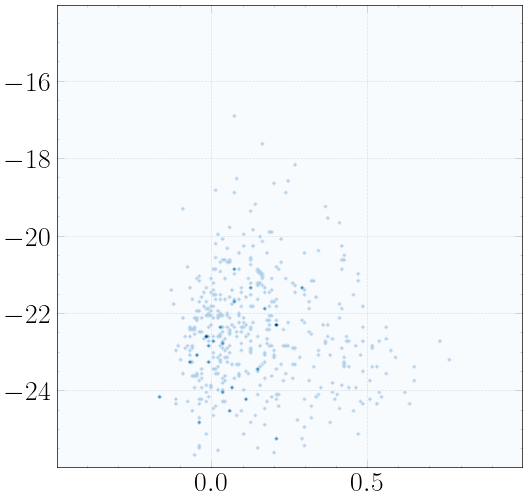

In [27]:
# ...existing code...
# data
TNG_50_Mg = TNG_50_control.SubhaloPhotoMag_merging_pop[:,4]
TNG_50_Mr = TNG_50_control.SubhaloPhotoMag_merging_pop[:,5]
x = (TNG_50_Mg - TNG_50_Mr)
y = TNG_50_Mr

# optional control sample
ctrl = TNG_50_pop["non_merging_population"]['SubhaloPhotoMag']
if ctrl.size:
    ctrl_x = ctrl[:,4] - ctrl[:,5]
    ctrl_y = ctrl[:,5]
else:
    ctrl_x = ctrl_y = np.array([])

# remove invalid points
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]; y = y[mask]

# grid & 2D histogram (no KDE)
xmin, xmax = -0.5, 1.0
ymin, ymax = -26, -14
xbins = 200
ybins = 200

H, xedges, yedges = np.histogram2d(x, y, bins=[xbins, ybins], range=[[xmin, xmax], [ymin, ymax]])
# histogram2d returns shape (xbins, ybins) -> transpose for contour plotting
xcenters = 0.5 * (xedges[:-1] + xedges[1:])
ycenters = 0.5 * (yedges[:-1] + yedges[1:])
X, Y = np.meshgrid(xcenters, ycenters)

# choose contour levels from percentiles of non-zero histogram values
vals = H.ravel()
vals = vals[vals > 0]
if vals.size:
    levels = np.percentile(vals, [50, 75, 90, 98])
else:
    levels = [1]  # fallback

# plot
hostplot.set_plot_style(linewidth=5, titlesize=20,labelsize=20,ticksize=5,legendsize=12)
fig, ax = plt.subplots(1,1,figsize=(6,6),sharex=True)

cf = ax.contourf(X, Y, H.T, levels=50, cmap='Blues', alpha=0.8)
c = ax.contour(X, Y, H.T, levels=levels, colors='k', linewidths=0.7)

# optional: overlay a faint scatter of points
ax.scatter(x, y, s=3, color='white', edgecolors='none', alpha=0.08)

# control contours (if available) using histogram2d as well
if ctrl_x.size:
    maskc = np.isfinite(ctrl_x) & np.isfinite(ctrl_y)
    if np.any(maskc):
        Hc, _, _ = np.histogram2d(ctrl_x[maskc], ctrl_y[maskc], bins=[xbins, ybins], range=[[xmin, xmax], [ymin, ymax]])
        valsc = Hc.ravel()
        valsc = valsc[valsc > 0]
        if valsc.size:
            lvl_c = np.percentile(valsc, 80)
            ax.contour(X, Y, Hc.T, levels=[lvl_c], colors='gray', linestyles='--')

ax.set_xlabel('g-r Color')
ax.set_ylabel('r-band Magnitude')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.invert_yaxis()
fig.colorbar(cf, ax=ax, label='Counts')
ax.legend([plt.Line2D([],[],color='k')], ['TNG50 (hist2d)'])
plt.show()